<a href="https://colab.research.google.com/github/isi1993/DRRR/blob/main/MY_PORTFPLIO_PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAD THE NECCESARY LIBRARY

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

LOAD THE FILE PATH

In [ ]:
DATA= pd.read_csv('/content/2017_Yellow_Taxi_Trip_Data (1).csv')
DATA.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


RENAME THE COLUMNS FOR BETTER UNDERSTANDING

In [ ]:

column_mapping = {
    'VendorID': 'Service_Provider_ID',
    'tpep_pickup_datetime': 'Pickup_Time',
    'tpep_dropoff_datetime': 'Drop_off_Time',
    'trip_distance': 'Trip_Distance_Miles',
    'RatecodeID': 'Rate_Code_ID',
    'store_and_fwd_flag': 'Stored_Flag',
    'PULocationID': 'Pickup_Location_ID',
    'DOLocationID': 'Dropoff_Location_ID',
    'payment_type': 'Payment_Method' ,

    'extra': 'Extra_Charges',
    'mta_tax': 'MTA_Tax_Amount',
    'tip_amount': 'Tip_Amount',
    'tolls_amount': 'Tolls_Amount',
    'months': 'Month',
    'weekday': 'Weekday',

}

# 1. Rename the columns
DATA.rename(columns=column_mapping, inplace=True)

In [ ]:
DATA.columns

Index(['Unnamed: 0', 'Service_Provider_ID', 'Pickup_Time', 'Drop_off_Time',
       'passenger_count', 'Trip_Distance_Miles', 'Rate_Code_ID', 'Stored_Flag',
       'Pickup_Location_ID', 'Dropoff_Location_ID', 'Payment_Method',
       'fare_amount', 'Extra_Charges', 'MTA_Tax_Amount', 'Tip_Amount',
       'Tolls_Amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [ ]:
DATA.head()

,Unnamed: 0,Service_Provider_ID,Pickup_Time,Drop_off_Time,passenger_count,Trip_Distance_Miles,Rate_Code_ID,Stored_Flag,Pickup_Location_ID,Dropoff_Location_ID,Payment_Method,fare_amount,Extra_Charges,MTA_Tax_Amount,Tip_Amount,Tolls_Amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


cheack for the data information

In [ ]:
DATA.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Service_Provider_ID    22699 non-null  int64  
 1   Pickup_Time            22699 non-null  object 
 2   Drop_off_Time          22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   Trip_Distance_Miles    22699 non-null  float64
 5   Rate_Code_ID           22699 non-null  int64  
 6   Stored_Flag            22699 non-null  object 
 7   Pickup_Location_ID     22699 non-null  int64  
 8   Dropoff_Location_ID    22699 non-null  int64  
 9   Payment_Method         22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  Extra_Charges          22699 non-null  float64
 12  MTA_Tax_Amount         22699 non-null  float64
 13  Tip_Amount             22699 non-null  float64
 14  Tolls_Amount           22699 non-null  float64
 15  im

In [ ]:
DATA.columns

Index(['Service_Provider_ID', 'Pickup_Time', 'Drop_off_Time',
       'passenger_count', 'Trip_Distance_Miles', 'Rate_Code_ID', 'Stored_Flag',
       'Pickup_Location_ID', 'Dropoff_Location_ID', 'Payment_Method',
       'fare_amount', 'Extra_Charges', 'MTA_Tax_Amount', 'Tip_Amount',
       'Tolls_Amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

CONVERT THE DATE COLUMN TO DATETIME

In [ ]:
DATA['Drop_off_Time'] = pd.to_datetime(DATA['Drop_off_Time'])
DATA['Pickup_Time'] = pd.to_datetime(DATA['Pickup_Time'])

In [ ]:
DATA.isnull().sum()

,0
Service_Provider_ID,0
Pickup_Time,0
Drop_off_Time,0
passenger_count,0
Trip_Distance_Miles,0
Rate_Code_ID,0
Stored_Flag,0
Pickup_Location_ID,0
Dropoff_Location_ID,0
Payment_Method,0


In [ ]:
DATA.duplicated().sum()

np.int64(0)

In [ ]:
# Assuming your dataframe is named 'df'
# 1. Total amount generated by each passenger count
total_by_passenger = DATA.groupby('passenger_count')['total_amount'].sum()


In [ ]:
total_by_passenger

,total_amount
passenger_count,
0,501.00
1,243456.61
2,52693.52
3,14936.44
4,6998.73
5,17773.51
6,10496.60


In [ ]:
DATA['passenger_count'].value_counts()

,count
passenger_count,
1,16117
2,3305
5,1143
3,953
6,693
4,455
0,33


In [ ]:
DATA.dtypes

,0
Service_Provider_ID,int64
Pickup_Time,datetime64[ns]
Drop_off_Time,datetime64[ns]
passenger_count,int64
Trip_Distance_Miles,float64
Rate_Code_ID,int64
Stored_Flag,object
Pickup_Location_ID,int64
Dropoff_Location_ID,int64
Payment_Method,int64


CONVERTING ALL THE ID COLUMN FROM INTERGER TO OBJECT

In [ ]:
# 1. Define the columns to be converted
columns_to_convert = ['Service_Provider_ID', 'Rate_Code_ID', 'Pickup_Location_ID', 'Dropoff_Location_ID']

# 2. Use the astype() method to convert the columns to the 'object' type
# 'object' is the pandas dtype for strings or mixed types
DATA[columns_to_convert] = DATA[columns_to_convert].astype('object')

In [ ]:
DATA['Trip_Distance_Miles'].describe()

,Trip_Distance_Miles
count,22699.000000
mean,2.913313
std,3.653171
min,0.000000
25%,0.990000
50%,1.610000
75%,3.060000
max,33.960000


In [ ]:
DATA.describe()

,Pickup_Time,Drop_off_Time,passenger_count,Trip_Distance_Miles,Payment_Method,fare_amount,Extra_Charges,MTA_Tax_Amount,Tip_Amount,Tolls_Amount,improvement_surcharge,total_amount
count,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
min,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000
std,NaN,NaN,1.285231,3.653171,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295


In [ ]:
DATA['fare_amount'].value_counts()

,count
fare_amount,
6.0,1163
6.5,1089
5.5,1081
7.0,1067
7.5,1018
...,...
73.5,1
94.2,1
66.5,1


CREATE A BOXPLOT FOR TRIP DISTANCE MILES

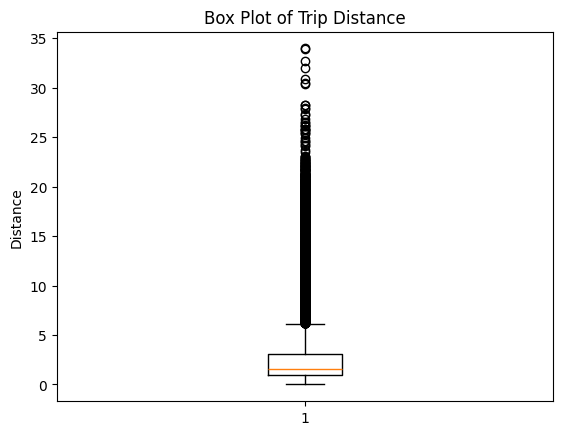

In [ ]:
# Create box plot
plt.boxplot(DATA['Trip_Distance_Miles'])
plt.title('Box Plot of Trip Distance')
plt.ylabel('Distance')
plt.show()

CREATE A BOX PLOT FOR THE FARE AMOUNT



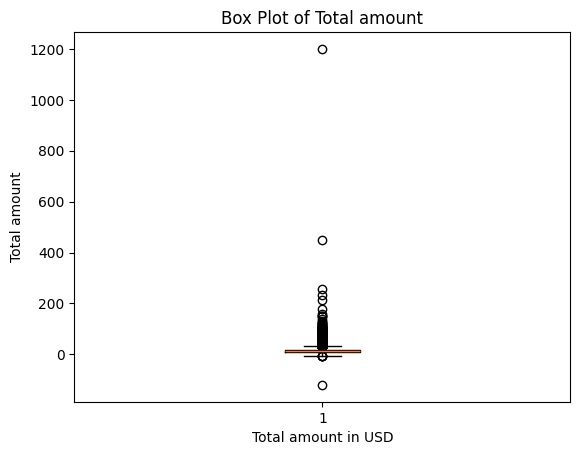

In [ ]:
# Create box plot
plt.boxplot(DATA['total_amount'])
plt.title('Box Plot of Total amount')
plt.xlabel('Total amount in USD')
plt.ylabel('Total amount')
plt.show()

In [ ]:
# Impute outliers
for column in ['fare_amount', 'Extra_Charges', 'total_amount', 'Tolls_Amount',
               'Tip_Amount', 'MTA_Tax_Amount']:
    threshold = DATA[column].quantile(0.95)
    DATA.loc[DATA[column] > threshold, column] = threshold

CREATE A HISTOGRAM DISTRIBUTION OF TRIP DISTANCE MILES

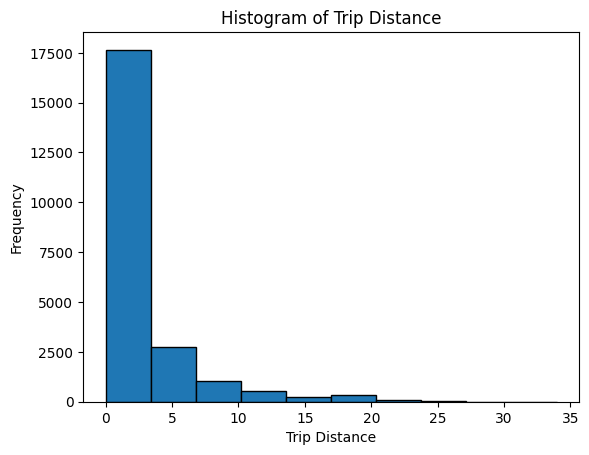

In [ ]:
# Create histogram to show the trip_distance column
DATA['Trip_Distance_Miles'].plot(kind='hist', bins=10, edgecolor='black')
plt.title('Histogram of Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.show()

CHECK FOR RELAATIONSHIP BETWEEN FARE AMOUNT AND TRIP DISTANCE MILES

In [ ]:

correlation = DATA['fare_amount'].corr(DATA['Trip_Distance_Miles'])

print("Correlation between fare and trip distance:", correlation)

Correlation between fare and trip distance: 0.8833599578821323


In [ ]:
DATA.dtypes

,0
Service_Provider_ID,object
Pickup_Time,datetime64[ns]
Drop_off_Time,datetime64[ns]
passenger_count,int64
Trip_Distance_Miles,float64
Rate_Code_ID,object
Stored_Flag,object
Pickup_Location_ID,object
Dropoff_Location_ID,object
Payment_Method,int64


In [ ]:
# Remove rows where distance is zero or missing
DATA = DATA[DATA['Trip_Distance_Miles'] > 0].copy()

In [ ]:
DATA

,Service_Provider_ID,Pickup_Time,Drop_off_Time,passenger_count,Trip_Distance_Miles,Rate_Code_ID,Stored_Flag,Pickup_Location_ID,Dropoff_Location_ID,Payment_Method,fare_amount,Extra_Charges,MTA_Tax_Amount,Tip_Amount,Tolls_Amount,improvement_surcharge,total_amount
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.35,0.00,0.3,27.69
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,36.0,0.0,0.5,6.35,5.54,0.3,46.06
22696,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [ ]:

# Remove rows where distance is zero or missing
DATA['fare_per_miles'] = DATA['fare_amount'] / DATA['Trip_Distance_Miles']

create the average fare  by distance

In [ ]:
average_fare_by_distance = DATA.groupby('Trip_Distance_Miles')['fare_amount'].mean()
print(average_fare_by_distance)

Trip_Distance_Miles
0.01     21.642857
0.02      5.818182
0.03      7.125000
0.04      1.750000
0.05      4.500000
           ...    
30.83    36.000000
31.95    36.000000
32.72    36.000000
33.92    36.000000
33.96    36.000000
Name: fare_amount, Length: 1544, dtype: float64


In [ ]:
import datetime as dt

In [ ]:
DATA['Pickup_Time'].min()

Timestamp('2017-01-01 00:08:25')

In [ ]:
DATA['Pickup_Time'].max()

Timestamp('2017-12-31 23:45:30')

In [ ]:
DATA['Year'] = DATA['Pickup_Time'].dt.year

In [ ]:
DATA['Year'].value_counts()

,count
Year,
2017,22551


In [ ]:
DATA.columns

Index(['Service_Provider_ID', 'Pickup_Time', 'Drop_off_Time',
       'passenger_count', 'Trip_Distance_Miles', 'Rate_Code_ID', 'Stored_Flag',
       'Pickup_Location_ID', 'Dropoff_Location_ID', 'Payment_Method',
       'fare_amount', 'Extra_Charges', 'MTA_Tax_Amount', 'Tip_Amount',
       'Tolls_Amount', 'improvement_surcharge', 'total_amount',
       'fare_per_miles', 'Year'],
      dtype='object')

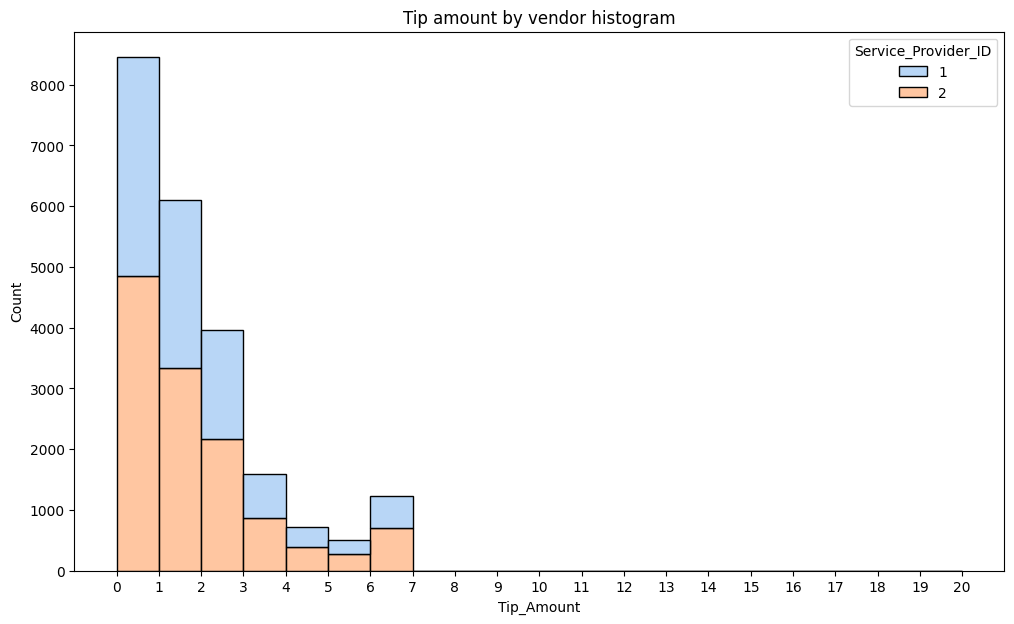

In [ ]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=DATA, x='Tip_Amount', bins=range(0,21,1),
                  hue='Service_Provider_ID',
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

In [ ]:
mean_tips_by_passenger_count = DATA.groupby(['passenger_count'])['Tip_Amount'].mean()
mean_tips_by_passenger_count

,Tip_Amount
passenger_count,
0,2.147813
1,1.663141
2,1.638046
3,1.553920
4,1.425711
5,1.683482
6,1.543962


In [ ]:
DATA.columns

Index(['Service_Provider_ID', 'Pickup_Time', 'Drop_off_Time',
       'passenger_count', 'Trip_Distance_Miles', 'Rate_Code_ID', 'Stored_Flag',
       'Pickup_Location_ID', 'Dropoff_Location_ID', 'Payment_Method',
       'fare_amount', 'Extra_Charges', 'MTA_Tax_Amount', 'Tip_Amount',
       'Tolls_Amount', 'improvement_surcharge', 'total_amount',
       'fare_per_miles', 'Year'],
      dtype='object')

/tmp/ipython-input-408268687.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_tips, x='passenger_count', y='Tip_Amount', palette='pastel')


<Axes: xlabel='passenger_count', ylabel='Tip_Amount'>

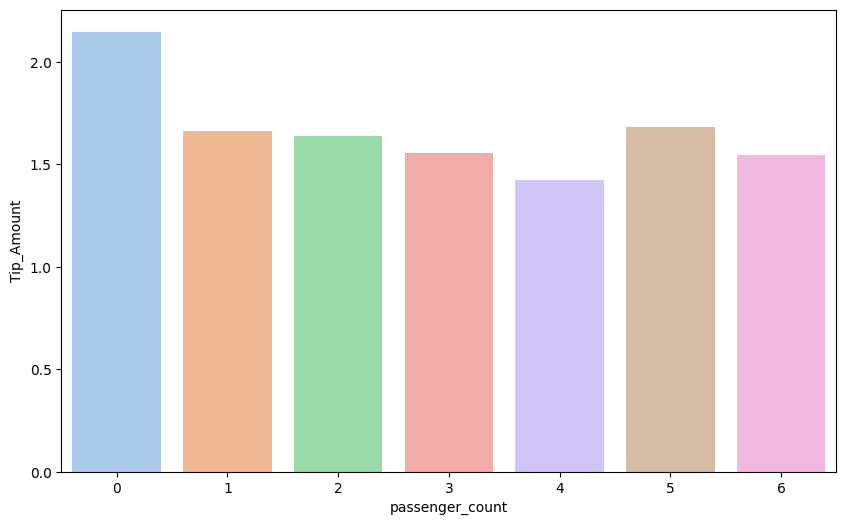

In [ ]:
# Compute mean tips by passenger count
mean_tips = DATA.groupby('passenger_count')['Tip_Amount'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_tips, x='passenger_count', y='Tip_Amount', palette='pastel')

In [ ]:
# Create a month column using a datetime column like 'Pickup_Time'
DATA['Months'] = DATA['Pickup_Time'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = DATA['Months'].value_counts()
monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

,count
Months,
January,1982
February,1759
March,2031
April,2008
May,2004
June,1945
July,1683
August,1717
September,1729


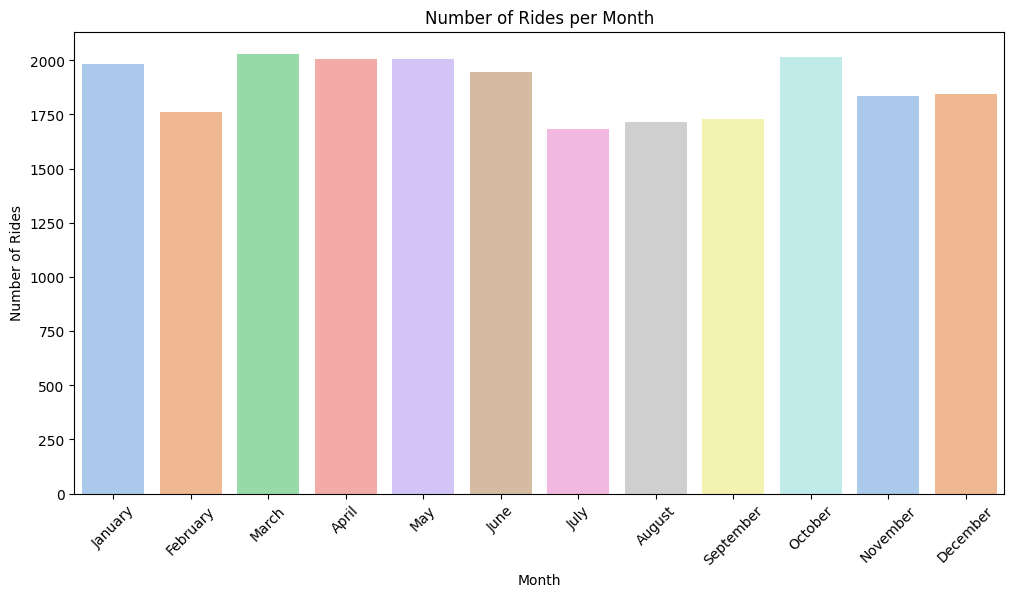

In [ ]:
# Create bar plot using the pre-computed monthly_rides
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_rides.index, y=monthly_rides.values, hue=monthly_rides.index, palette='pastel', legend=False)
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

In [ ]:
DATA.columns

Index(['Service_Provider_ID', 'Pickup_Time', 'Drop_off_Time',
       'passenger_count', 'Trip_Distance_Miles', 'Rate_Code_ID', 'Stored_Flag',
       'Pickup_Location_ID', 'Dropoff_Location_ID', 'Payment_Method',
       'fare_amount', 'Extra_Charges', 'MTA_Tax_Amount', 'Tip_Amount',
       'Tolls_Amount', 'improvement_surcharge', 'total_amount',
       'fare_per_miles', 'Year', 'Months'],
      dtype='object')

In [ ]:
DATA.columns

Index(['Service_Provider_ID', 'Pickup_Time', 'Drop_off_Time',
       'passenger_count', 'Trip_Distance_Miles', 'Rate_Code_ID', 'Stored_Flag',
       'Pickup_Location_ID', 'Dropoff_Location_ID', 'Payment_Method',
       'fare_amount', 'Extra_Charges', 'MTA_Tax_Amount', 'Tip_Amount',
       'Tolls_Amount', 'improvement_surcharge', 'total_amount',
       'fare_per_miles', 'Year', 'Months'],
      dtype='object')

In [ ]:
total_Revenue_by_service_provider = DATA.groupby('Service_Provider_ID')['total_amount'].sum()
total_Revenue_by_service_provider

,total_amount
Service_Provider_ID,
1,154220.24
2,192636.17


In [ ]:
# Assuming your dataframe is named 'df'
# 1. Total amount generated by each passenger count
total_payment_by_method = DATA.groupby('Payment_Method')['total_amount'].sum()

In [ ]:
total_payment_by_method

,total_amount
Payment_Method,
1,250765.40
2,94265.90
3,1359.19
4,465.92


create the month column from the Pickup_Time columns

In [ ]:
# Create a month column using a datetime column like 'Pickup_Time'
DATA['Months'] = DATA['Pickup_Time'].dt.month_name()

create the weekdays columns from the pickup time column

In [ ]:
# Create a day column
DATA['weekday'] = DATA['Pickup_Time'].dt.day_name()

# create the hour of the days columns from the dataset

In [ ]:
DATA['hours_of_day'] = DATA['Pickup_Time'].dt.hour

cheak  for trip by  hour  of day   

In [ ]:
DATA['hours_of_day'].value_counts()

,count
hours_of_day,
19,1446
18,1440
20,1283
21,1278
14,1220
17,1208
22,1200
15,1164
16,1122


it was evidence that majority the leading trip where done at night between 6pm to 12 midnight

In [ ]:
DATA['weekday'].value_counts()

,count
weekday,
Friday,3389
Thursday,3373
Wednesday,3373
Saturday,3355
Tuesday,3167
Sunday,2978
Monday,2916


# from the above count of trip by weekdays i saw that there is rise in the number of people booking a trip from tuesdays althrough to the end of weekends with a drop on mondays

In [ ]:
DATA['Months'].value_counts()

,count
Months,
March,2031
October,2013
April,2008
May,2004
January,1982
June,1945
December,1846
November,1834
February,1759


In [ ]:
DATA['Months'].unique()

array(['March', 'April', 'December', 'May', 'August', 'February',
       'November', 'June', 'July', 'October', 'January', 'September'],
      dtype=object)

In [ ]:
DATA.isnull().sum()

,0
Service_Provider_ID,0
Pickup_Time,0
Drop_off_Time,0
passenger_count,0
Trip_Distance_Miles,0
Rate_Code_ID,0
Stored_Flag,0
Pickup_Location_ID,0
Dropoff_Location_ID,0
Payment_Method,0


# i created the quarter column to check for quarter performance of business

In [ ]:
DATA['quarter'] = DATA['Pickup_Time'].dt.quarter
DATA['season'] = DATA['Pickup_Time'].dt.month % 12 // 3 + 1   # seasons 1–4

# i created the season column to cheack for seasonal performance

In [ ]:
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
DATA['season_name'] = DATA['season'].map(season_map)

In [ ]:
seasonal_demand = DATA.groupby('season_name').size()
print(seasonal_demand)


season_name
Fall      5576
Spring    6043
Summer    5345
Winter    5587
dtype: int64


cheack for which group recorded the highest passenger count

In [ ]:
DATA['passenger_count'].value_counts()

,count
passenger_count,
1,16002
2,3286
5,1143
3,949
6,689
4,450
0,32


# cheack for number of pickup location

In [ ]:
DATA['Pickup_Location_ID'].value_counts().head()

,count
Pickup_Location_ID,
237,889
161,859
186,786
236,785
162,771


# cheack for the location with the highest dropoff

In [ ]:
DATA['Dropoff_Location_ID'].value_counts().head()

,count
Dropoff_Location_ID,
161,855
236,801
230,759
237,758
170,697


# The High-traffic corridors (Pickup_LocationID → Drop_Off_LocationID 161, 237, 236

In [ ]:
DATA['Payment_Method'].unique()

array([1, 2, 3, 4])

count the various value of payment method

In [ ]:
DATA['passenger_count'].value_counts()

,count
passenger_count,
1,16002
2,3286
5,1143
3,949
6,689
4,450
0,32


cheack the proportion of various payment method

In [ ]:
DATA['Payment_Method'].value_counts(normalize=True) * 100

,proportion
Payment_Method,
1,67.416079
2,31.945368
3,0.447874
4,0.190679


In [ ]:
DATA['Tip_Amount'].unique()

array([2.76, 4.  , 1.45, 6.35, 0.  , 2.06, 1.78, 2.75, 2.46, 3.35, 2.16,
       4.55, 3.  , 2.85, 3.2 , 1.  , 2.05, 1.25, 2.79, 2.35, 1.77, 3.45,
       1.7 , 0.72, 5.  , 2.26, 1.95, 2.  , 1.82, 1.36, 2.55, 0.86, 1.26,
       4.05, 3.39, 1.59, 1.16, 1.76, 1.15, 5.76, 2.86, 1.46, 2.22, 1.86,
       5.34, 3.66, 5.3 , 0.5 , 1.24, 1.2 , 4.66, 3.32, 1.35, 4.46, 0.7 ,
       4.56, 3.75, 1.17, 1.06, 2.2 , 1.05, 2.66, 3.95, 2.65, 3.56, 3.76,
       2.36, 2.96, 1.65, 1.02, 3.15, 3.05, 3.25, 1.5 , 1.6 , 4.75, 0.96,
       2.3 , 1.1 , 1.75, 3.96, 1.55, 1.56, 5.36, 1.96, 2.82, 3.69, 1.66,
       1.85, 3.26, 5.79, 4.45, 1.4 , 3.38, 5.06, 3.7 , 2.08, 2.7 , 0.34,
       2.15, 3.08, 4.96, 0.87, 1.62, 3.82, 2.56, 1.8 , 5.55, 4.95, 2.5 ,
       2.19, 1.74, 3.99, 5.6 , 0.95, 3.5 , 2.25, 0.94, 5.75, 3.36, 6.32,
       5.86, 2.04, 2.45, 5.95, 4.26, 3.3 , 0.75, 3.85, 5.26, 3.16, 3.44,
       3.54, 6.  , 4.85, 4.65, 4.37, 4.36, 1.47, 5.58, 2.9 , 2.94, 5.85,
       3.86, 4.16, 1.58, 2.23, 3.55, 3.84, 5.16, 1.

# graphical representation of the tip amount column

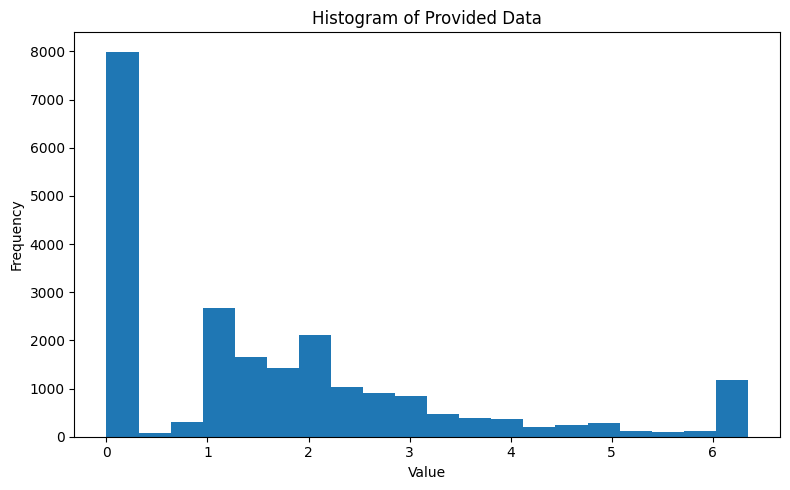

In [ ]:

plt.figure(figsize=(8,5))
plt.hist(DATA['Tip_Amount'], bins=20)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Provided Data")
plt.tight_layout()
plt.show()

# Calculate average tip by hour

In [ ]:
# Calculate average tip by hour
avg_tip_by_hour = (
    DATA.groupby('hours_of_day')['Tip_Amount']
      .mean()
      .reset_index()
      .rename(columns={'Tip_Amount': 'avg_tip'})
)

print(avg_tip_by_hour)


    hours_of_day   avg_tip
0              0  1.659932
1              1  1.515566
2              2  1.633159
3              3  1.456092
4              4  1.492857
5              5  1.711496
6              6  1.513778
7              7  1.606428
8              8  1.685494
9              9  1.678221
10            10  1.560473
11            11  1.621436
12            12  1.537787
13            13  1.529304
14            14  1.586607
15            15  1.511495
16            16  1.629724
17            17  1.645687
18            18  1.763826
19            19  1.645104
20            20  1.698301
21            21  1.823920
22            22  1.848500
23            23  1.764393


In [ ]:
DATA.columns

Index(['Service_Provider_ID', 'Pickup_Time', 'Drop_off_Time',
       'passenger_count', 'Trip_Distance_Miles', 'Rate_Code_ID', 'Stored_Flag',
       'Pickup_Location_ID', 'Dropoff_Location_ID', 'Payment_Method',
       'fare_amount', 'Extra_Charges', 'MTA_Tax_Amount', 'Tip_Amount',
       'Tolls_Amount', 'improvement_surcharge', 'total_amount',
       'fare_per_miles', 'Year', 'Months', 'weekday', 'hours_of_day',
       'quarter', 'season', 'season_name', 'trip_duration', 'Speed',
       'Tip_percentage', 'AverageFare', 'AverageTripDistance',
       'AverageTripDuration', 'AverageSpeed', 'AverageTipInPercentage',
       'AverageTip'],
      dtype='object')

CALCULATE AVERAGE TIP BY DISTANCE

In [ ]:
# Calculate average tip by distance
avg_tip_by_hour = (
    DATA.groupby('Trip_Distance_Miles')['Tip_Amount']
      .mean()
      .reset_index()
      .rename(columns={'Tip_Amount': 'avg_tip'})
)

print(avg_tip_by_hour)

      Trip_Distance_Miles   avg_tip
0                    0.01  0.907143
1                    0.02  1.154545
2                    0.03  0.000000
3                    0.04  0.000000
4                    0.05  0.000000
...                   ...       ...
1539                30.83  6.350000
1540                31.95  0.000000
1541                32.72  6.350000
1542                33.92  6.350000
1543                33.96  0.000000

[1544 rows x 2 columns]


In [ ]:
DATA['Service_Provider_ID'].unique()

array([2, 1], dtype=object)

# CALCULATE THE AVERAGE TIP BY VENDOR OR SERVICE PROVIDER

In [ ]:
# Calculate average tip by service provider
avg_tip_by_vendor = (
    DATA.groupby('Service_Provider_ID')['Tip_Amount']
      .mean()
      .reset_index()
      .rename(columns={'Tip_Amount': 'avg_tip'})
)

print(avg_tip_by_vendor)

   Service_Provider_ID   avg_tip
0                    1  1.666008
1                    2  1.634086


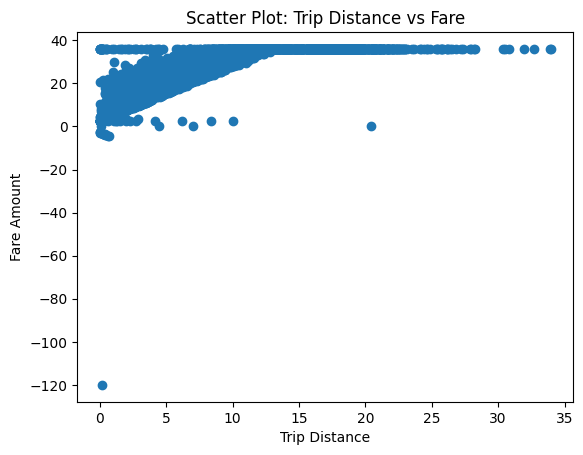

In [ ]:
plt.figure()
plt.scatter(DATA['Trip_Distance_Miles'], DATA['fare_amount'])
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Scatter Plot: Trip Distance vs Fare')

plt.show()

In [ ]:
# THE
DATA['total_amount'].mean()

np.float64(15.380976896811672)

# THE MAXIMUM NUMBER OF THE VARIOUS COLUMNS SUCH AS PICKUP_LOCATION_ID, DROPOFF_LOCATION _ID,TOTAL_AMOUNT

In [ ]:
max_total_amount_row = DATA.loc[DATA['total_amount'].idxmax(),
                                ['Pickup_Location_ID', 'Dropoff_Location_ID', 'total_amount']]
print(max_total_amount_row)

Pickup_Location_ID        79
Dropoff_Location_ID      241
total_amount           46.06
Name: 6, dtype: object


CHEACK FOR TOTAL AMOUNT BY PICKUP_LOCATION_ID

In [ ]:
DATA[['total_amount', 'Pickup_Location_ID']].value_counts()

total_amount  Pickup_Location_ID
46.06         132                   387
              138                   253
8.30          237                    35
46.06         161                    31
8.30          48                     30
                                   ... 
3.30          163                     1
              162                     1
              144                     1
              141                     1
              106                     1
Name: count, Length: 8652, dtype: int64

CALCULATE THE PROPORTION OF VARIOUS SERVICE PROVIDER

In [ ]:
DATA['Service_Provider_ID'].value_counts(normalize=True) * 100

,proportion
Service_Provider_ID,
2,55.700412
1,44.299588


In [ ]:
DATA.columns

Index(['Service_Provider_ID', 'Pickup_Time', 'Drop_off_Time',
       'passenger_count', 'Trip_Distance_Miles', 'Rate_Code_ID', 'Stored_Flag',
       'Pickup_Location_ID', 'Dropoff_Location_ID', 'Payment_Method',
       'fare_amount', 'Extra_Charges', 'MTA_Tax_Amount', 'Tip_Amount',
       'Tolls_Amount', 'improvement_surcharge', 'total_amount',
       'fare_per_miles', 'Year', 'Months', 'weekday', 'hours_of_day',
       'quarter', 'season', 'season_name'],
      dtype='object')

In [ ]:
DATA['Dropoff_Location_ID'].value_counts()

,count
Dropoff_Location_ID,
161,855
236,801
230,759
237,758
170,697
...,...
222,1
124,1
73,1


# Histogram: trip distance

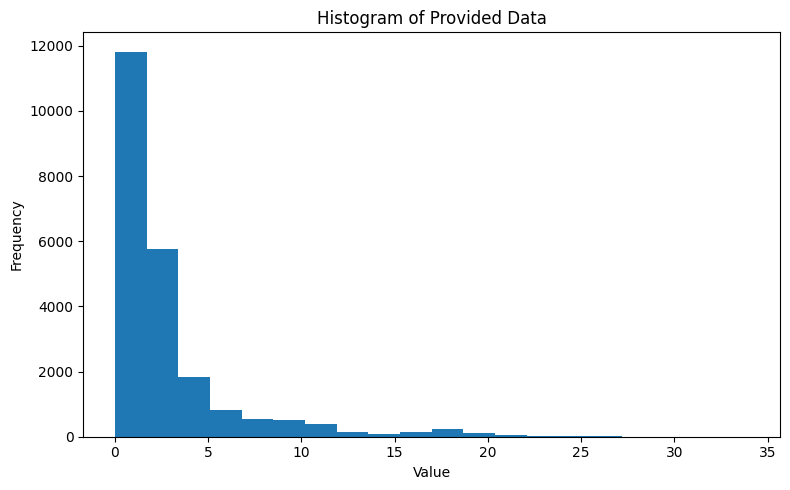

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(DATA['Trip_Distance_Miles'], bins=20)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Provided Data")
plt.tight_layout()
plt.show()

In [ ]:
DATA['hours_of_day'].value_counts()

,count
hours_of_day,
19,1446
18,1440
20,1283
21,1278
14,1220
17,1208
22,1200
15,1164
16,1122


DISTRIBUTION OF TRIP BY HOURS OF THE DAY

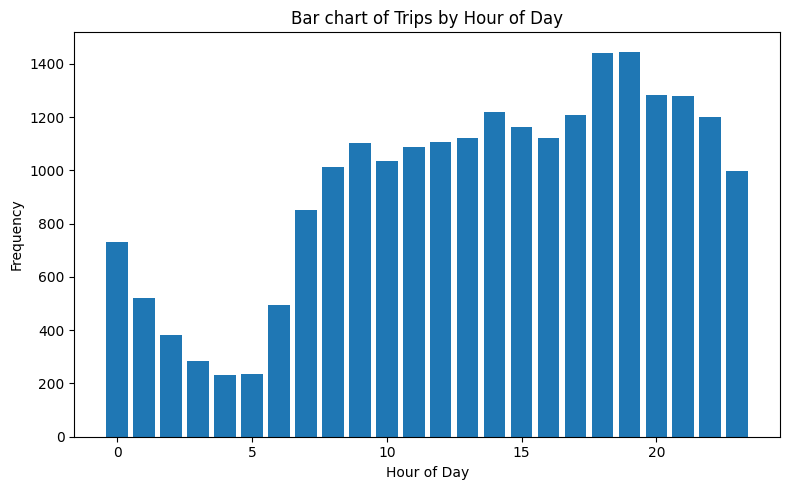

In [ ]:
hour_counts = DATA['hours_of_day'].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.title("Bar chart of Trips by Hour of Day")
plt.tight_layout()
plt.show()

In [ ]:
DATA.columns

Index(['Service_Provider_ID', 'Pickup_Time', 'Drop_off_Time',
       'passenger_count', 'Trip_Distance_Miles', 'Rate_Code_ID', 'Stored_Flag',
       'Pickup_Location_ID', 'Dropoff_Location_ID', 'Payment_Method',
       'fare_amount', 'Extra_Charges', 'MTA_Tax_Amount', 'Tip_Amount',
       'Tolls_Amount', 'improvement_surcharge', 'total_amount',
       'fare_per_miles', 'Year', 'Months', 'weekday', 'hours_of_day',
       'quarter', 'season', 'season_name', 'trip_duration', 'Speed',
       'Tip_percentage', 'AverageFare', 'AverageTripDistance',
       'AverageTripDuration', 'AverageSpeed', 'AverageTipInPercentage',
       'AverageTip'],
      dtype='object')

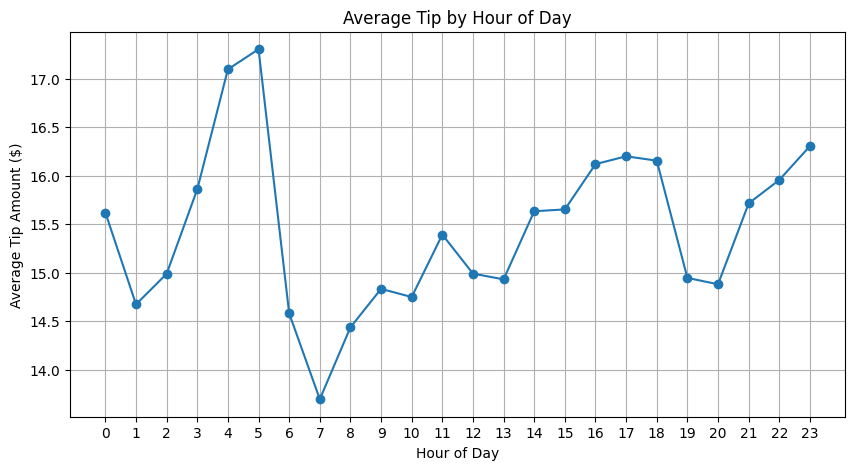

In [ ]:
# Recalculate average tip by hour to ensure 'hours_of_day' column is present
avg_tip_by_hour = (
    DATA.groupby('hours_of_day')['total_amount']
      .mean()
      .reset_index()
      .rename(columns={'total_amount': 'AverageTip'})
)

plt.figure(figsize=(10,5))
plt.plot(avg_tip_by_hour["hours_of_day"], avg_tip_by_hour["AverageTip"], marker="o")
plt.title("Average Tip by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Tip Amount ($)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

FROM THE BAR CHART THERE IS 40% INCREACE IN  TRIP FROM 6PM  TO MIDNIGHT OR NEXT DAY

CREATE A LINE CHART THAT DETERMINE TO DETERNINE TIP BY HOUR OF THE DAY

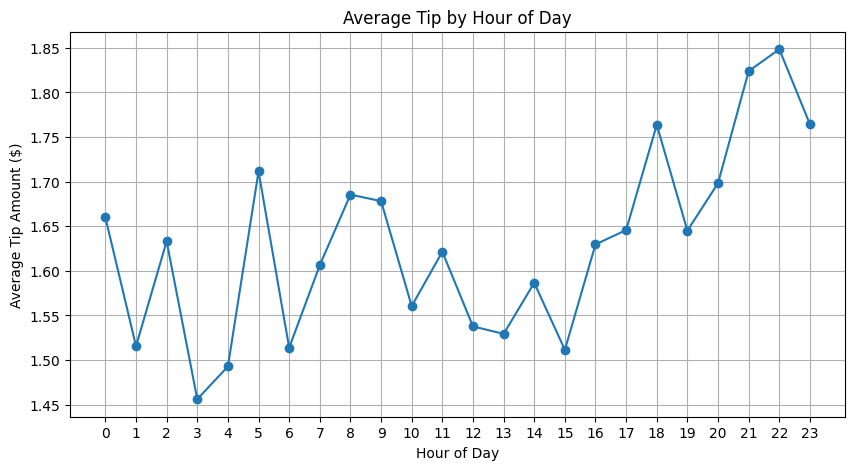

In [ ]:
# Recalculate average tip by hour to ensure 'hours_of_day' column is present
avg_tip_by_hour = (
    DATA.groupby('hours_of_day')['Tip_Amount']
      .mean()
      .reset_index()
      .rename(columns={'Tip_Amount': 'avg_tip'})
)

plt.figure(figsize=(10,5))
plt.plot(avg_tip_by_hour["hours_of_day"], avg_tip_by_hour["avg_tip"], marker="o")
plt.title("Average Tip by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Tip Amount ($)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

GRAPHICAL REPRESENTATION OF VARIOUS PAYMENT METHOD

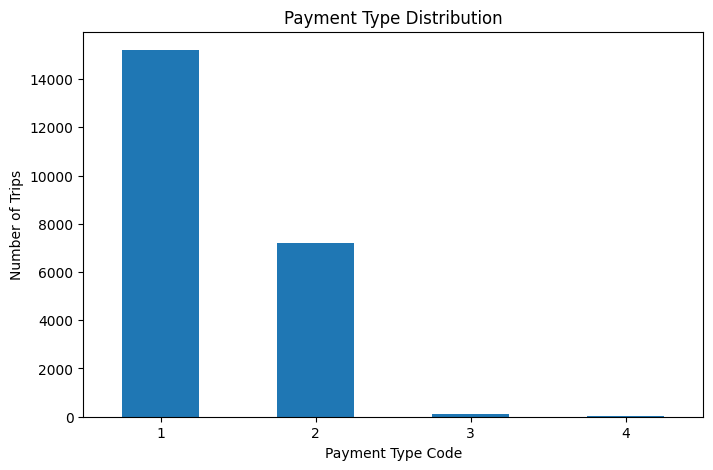

In [ ]:
payment_counts = DATA['Payment_Method'].value_counts().sort_index()

plt.figure(figsize=(8,5))
payment_counts.plot(kind='bar')
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type Code')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()

A SCATTER PLOT REPRESENTING THE RELATIONSHIP BETWEEN FARE AMOUNT AND TRIP DISTANCE

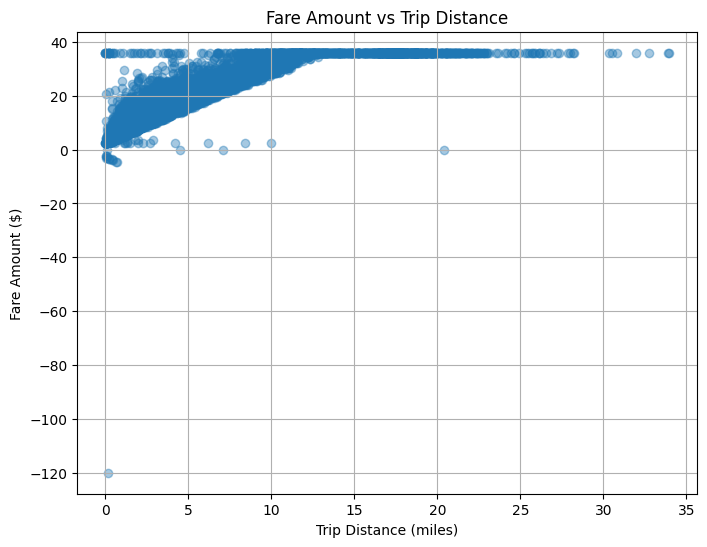

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(DATA['Trip_Distance_Miles'], DATA['fare_amount'], alpha=0.4)
plt.title("Fare Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

A HEATMAP SHOWING CORRECLATION BETWEEN VARIOUS VARIABLE OF THE DATESET


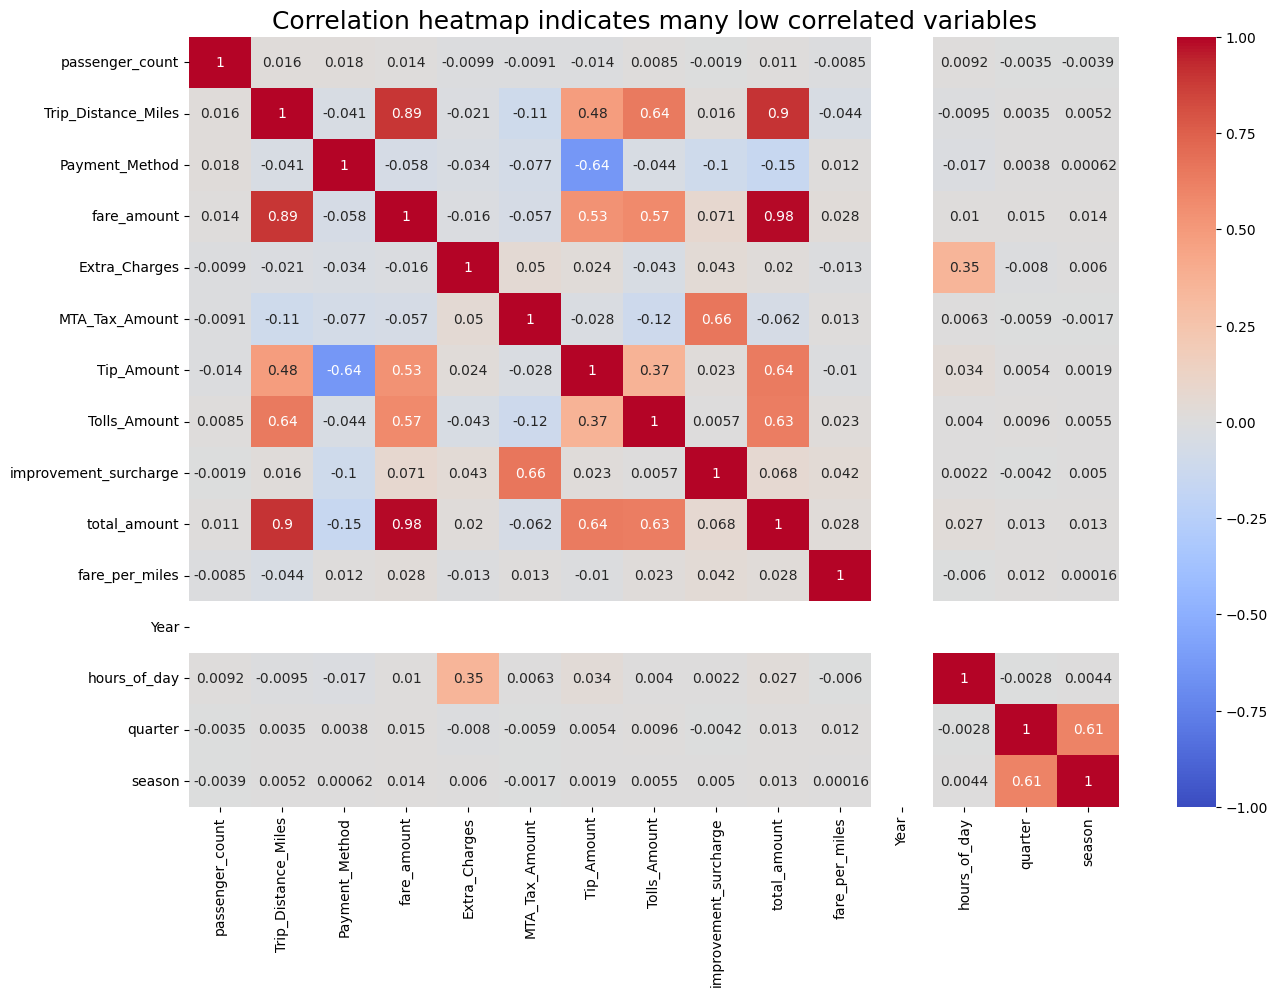

In [ ]:
# Plot correlation heatmap
### YOUR CODE HERE ###
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(DATA.corr(method='pearson', numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

from the heatmap above i delude there is positive correclation amoung various columns

# create trip duration column

In [ ]:
DATA['trip_duration'] = DATA['Drop_off_Time'] - DATA['Pickup_Time']

CREATE THE TRIP SPEED COLUMN

In [ ]:

DATA['Speed'] = DATA['Trip_Distance_Miles'] / (DATA['trip_duration'].dt.total_seconds() / 3600)

TIP PERCENTAGE FOR EACH TRIP

In [ ]:
DATA['Tip_percentage'] = DATA['Tip_Amount'] / DATA['fare_amount'] * 100

In [ ]:
DATA['Stored_Flag'].value_counts()

,count
Stored_Flag,
N,22453
Y,98


In [ ]:
DATA['Tip_percentage'].value_counts()

,count
Tip_percentage,
0.000000,7954
17.638889,622
22.000000,229
16.666667,220
20.000000,197
...,...
16.979592,1
7.525424,1
14.545455,1


In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = DATA['Months'].value_counts()
monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

,count
Months,
January,1982
February,1759
March,2031
April,2008
May,2004
June,1945
July,1683
August,1717
September,1729


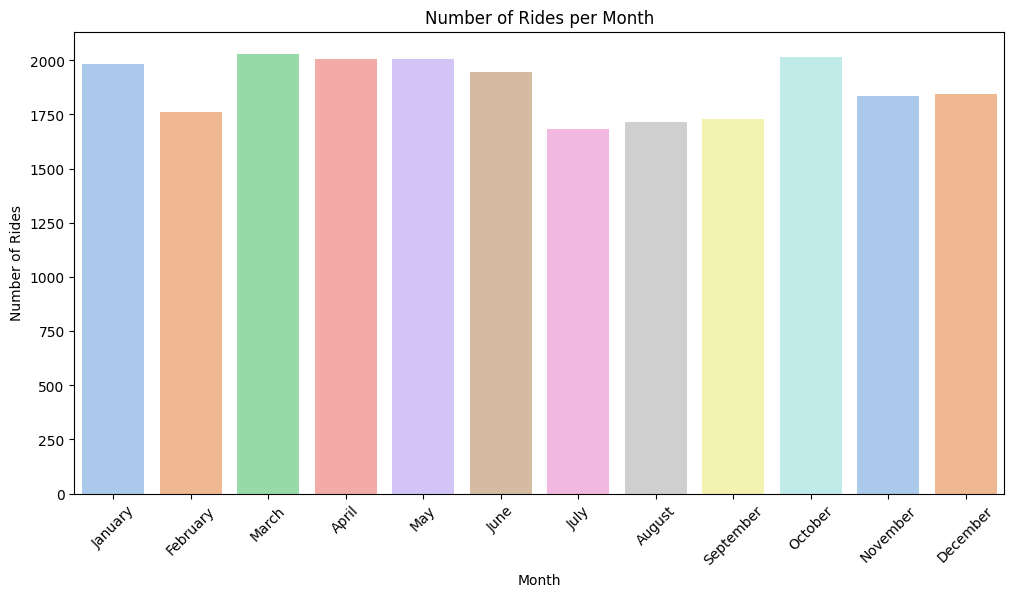

In [ ]:
# Create bar plot using the pre-computed monthly_rides
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_rides.index, y=monthly_rides.values, hue=monthly_rides.index, palette='pastel', legend=False)
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

In [ ]:
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [ ]:
DATA['weekday'].value_counts()

,count
weekday,
Friday,3389
Thursday,3373
Wednesday,3373
Saturday,3355
Tuesday,3167
Sunday,2978
Monday,2916


In [ ]:
weekdays_rides = DATA['weekday'].value_counts()
weekdays_rides = weekdays_rides.reindex(index=weekdays_order)
weekdays_rides

,count
weekday,
Monday,2916
Tuesday,3167
Wednesday,3373
Thursday,3373
Friday,3389
Saturday,3355
Sunday,2978


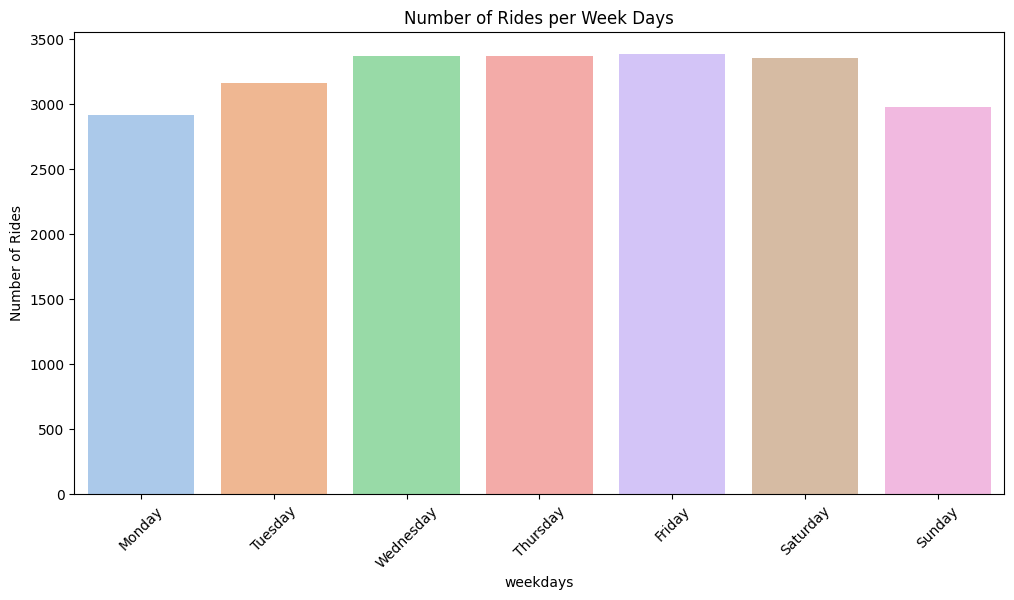

In [ ]:
# Create bar plot using the pre-computed monthly_rides
plt.figure(figsize=(12, 6))
sns.barplot(x=weekdays_rides.index, y=weekdays_rides.values, hue=weekdays_rides.index, palette='pastel', legend=False)
plt.title('Number of Rides per Week Days')
plt.xlabel('weekdays')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Repeat the process, this time for total revenue by day
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = DATA.groupby('weekday')['total_amount'].sum()
total_amount_day = total_amount_day.reindex(index=weekdays_order)
total_amount_day

,total_amount
weekday,
Monday,45308.88
Tuesday,48632.41
Wednesday,52673.43
Thursday,53464.58
Friday,52655.19
Saturday,48638.43
Sunday,45483.49


Text(0, 0.5, 'REVENUE')

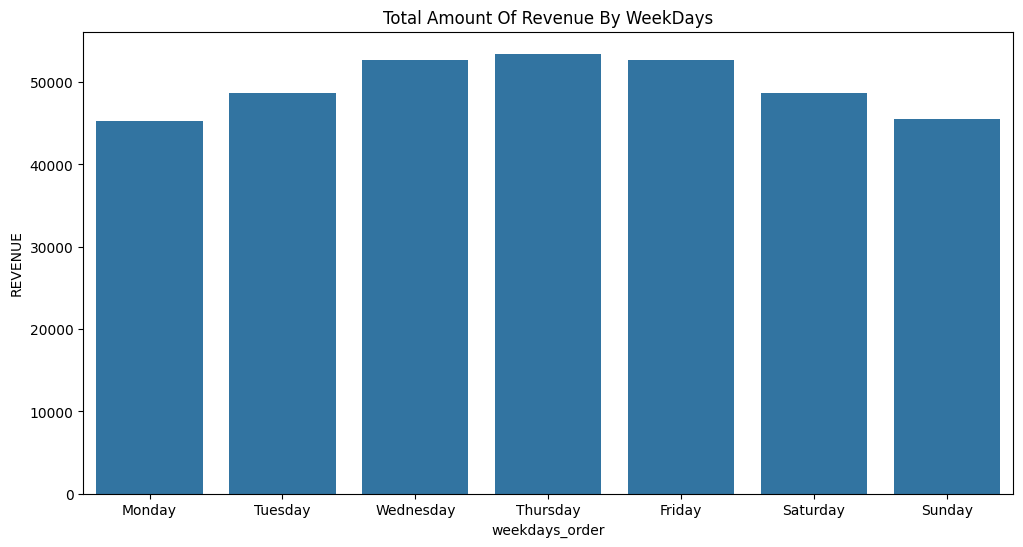

In [ ]:
# Create bar plot using the pre-computed monthly_rides
plt.figure(figsize=(12, 6))
sns.barplot(x=total_amount_day.index,  y=total_amount_day)
plt.title('Total Amount Of Revenue By WeekDays')
plt.xlabel('weekdays_order')
plt.ylabel('REVENUE')

In [ ]:
DATA.columns

Index(['Service_Provider_ID', 'Pickup_Time', 'Drop_off_Time',
       'passenger_count', 'Trip_Distance_Miles', 'Rate_Code_ID', 'Stored_Flag',
       'Pickup_Location_ID', 'Dropoff_Location_ID', 'Payment_Method',
       'fare_amount', 'Extra_Charges', 'MTA_Tax_Amount', 'Tip_Amount',
       'Tolls_Amount', 'improvement_surcharge', 'total_amount',
       'fare_per_miles', 'Year', 'Months', 'weekday', 'hours_of_day',
       'quarter', 'season', 'season_name', 'trip_duration', 'Speed',
       'Tip_percentage'],
      dtype='object')

In [ ]:
# Repeat the process, this time for total revenue by month
total_amount_month = DATA.groupby('Months')['total_amount'].sum()
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
Months,
January,29623.03
February,26428.85
March,31033.50
April,30313.34
May,31918.73
June,30427.07
July,25402.67
August,26444.20
September,26525.84


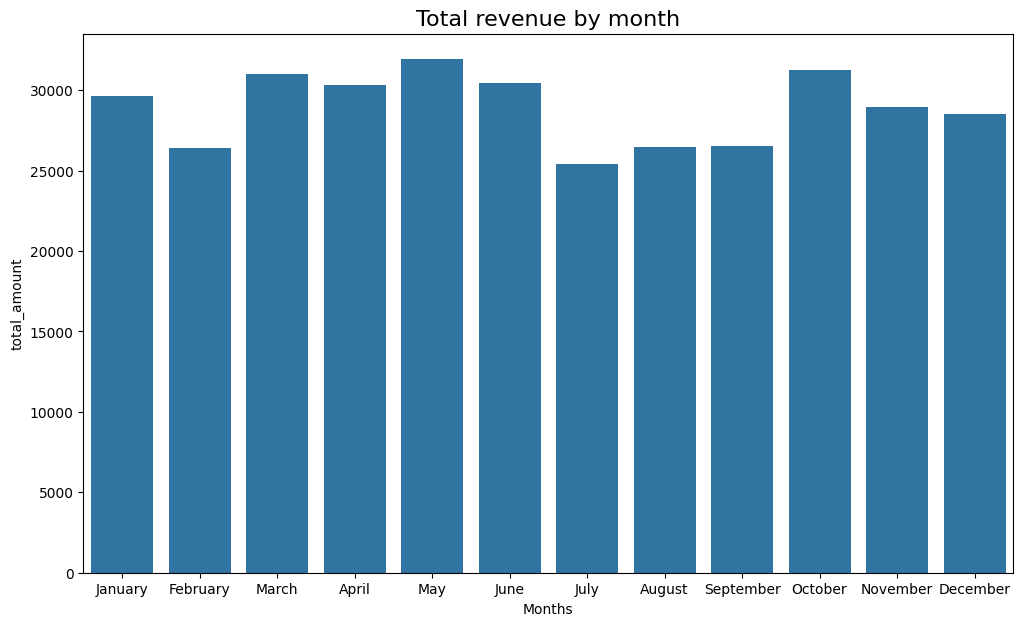

In [ ]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month)
plt.title('Total revenue by month', fontsize=16);

In [ ]:
DATA.columns

Index(['Service_Provider_ID', 'Pickup_Time', 'Drop_off_Time',
       'passenger_count', 'Trip_Distance_Miles', 'Rate_Code_ID', 'Stored_Flag',
       'Pickup_Location_ID', 'Dropoff_Location_ID', 'Payment_Method',
       'fare_amount', 'Extra_Charges', 'MTA_Tax_Amount', 'Tip_Amount',
       'Tolls_Amount', 'improvement_surcharge', 'total_amount',
       'fare_per_miles', 'Year', 'Months', 'weekday', 'hours_of_day',
       'quarter', 'season', 'season_name', 'trip_duration', 'Speed',
       'Tip_percentage'],
      dtype='object')

In [ ]:
DATA['Tip_percentage'].unique()

array([21.23076923, 25.        , 22.30769231, ..., 10.58823529,
       33.17647059, 21.44      ])

In [ ]:
DATA.columns

Index(['Service_Provider_ID', 'Pickup_Time', 'Drop_off_Time',
       'passenger_count', 'Trip_Distance_Miles', 'Rate_Code_ID', 'Stored_Flag',
       'Pickup_Location_ID', 'Dropoff_Location_ID', 'Payment_Method',
       'fare_amount', 'Extra_Charges', 'MTA_Tax_Amount', 'Tip_Amount',
       'Tolls_Amount', 'improvement_surcharge', 'total_amount',
       'fare_per_miles', 'Year', 'Months', 'weekday', 'hours_of_day',
       'quarter', 'season', 'season_name', 'trip_duration', 'Speed',
       'Tip_percentage'],
      dtype='object')

In [ ]:
DATA['trip_duration'].value_counts()

,count
trip_duration,
0 days 00:07:05,35
0 days 00:07:34,34
0 days 00:09:50,34
0 days 00:04:44,32
0 days 00:06:58,32
...,...
0 days 01:34:15,1
0 days 00:37:32,1
0 days 00:55:44,1


In [ ]:
DATA['season_name'].value_counts()

,count
season_name,
Spring,6043
Winter,5587
Fall,5576
Summer,5345


In [ ]:
# Calculate averages
avg_fare = DATA['fare_amount'].mean()
avg_distance = DATA['Trip_Distance_Miles'].mean()
avg_duration = DATA['trip_duration'].mean()
avg_tip = DATA['Tip_Amount'].mean()
avg_speed = DATA['Speed'].mean()
avg_tip_percentage = DATA['Tip_percentage'].mean()

# Create average columns
DATA['AverageFare'] = avg_fare
DATA['AverageTripDistance'] = avg_distance
DATA['AverageTripDuration'] = avg_duration
DATA['AverageSpeed'] = avg_speed
DATA['AverageTipInPercentage'] = avg_tip_percentage
DATA['AverageTip'] = avg_tip
print(DATA)

      Service_Provider_ID         Pickup_Time       Drop_off_Time  \
0                       2 2017-03-25 08:55:43 2017-03-25 09:09:47   
1                       1 2017-04-11 14:53:28 2017-04-11 15:19:58   
2                       1 2017-12-15 07:26:56 2017-12-15 07:34:08   
3                       2 2017-05-07 13:17:59 2017-05-07 13:48:14   
4                       2 2017-04-15 23:32:20 2017-04-15 23:49:03   
...                   ...                 ...                 ...   
22694                   2 2017-02-24 17:37:23 2017-02-24 17:40:39   
22695                   2 2017-08-06 16:43:59 2017-08-06 17:24:47   
22696                   2 2017-09-04 14:54:14 2017-09-04 14:58:22   
22697                   2 2017-07-15 12:56:30 2017-07-15 13:08:26   
22698                   1 2017-03-02 13:02:49 2017-03-02 13:16:09   

       passenger_count  Trip_Distance_Miles Rate_Code_ID Stored_Flag  \
0                    6                 3.34            1           N   
1                    1     

In [ ]:
DATA.to_csv('DATA.csv2', index=False) # Save the DataFrame to a CSV file
from google.colab import files

files.download('DATA.csv2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
DATA.columns

Index(['Service_Provider_ID', 'Pickup_Time', 'Drop_off_Time',
       'passenger_count', 'Trip_Distance_Miles', 'Rate_Code_ID', 'Stored_Flag',
       'Pickup_Location_ID', 'Dropoff_Location_ID', 'Payment_Method',
       'fare_amount', 'Extra_Charges', 'MTA_Tax_Amount', 'Tip_Amount',
       'Tolls_Amount', 'improvement_surcharge', 'total_amount',
       'fare_per_miles', 'Year', 'Months', 'weekday', 'hours_of_day',
       'quarter', 'season', 'season_name', 'trip_duration', 'Speed',
       'Tip_percentage', 'AverageFare', 'AverageTripDistance',
       'AverageTripDuration', 'AverageSpeed', 'AverageTipInPercentage',
       'AverageTip'],
      dtype='object')

In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22551 entries, 0 to 22698
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Service_Provider_ID     22551 non-null  object         
 1   Pickup_Time             22551 non-null  datetime64[ns] 
 2   Drop_off_Time           22551 non-null  datetime64[ns] 
 3   passenger_count         22551 non-null  int64          
 4   Trip_Distance_Miles     22551 non-null  float64        
 5   Rate_Code_ID            22551 non-null  object         
 6   Stored_Flag             22551 non-null  object         
 7   Pickup_Location_ID      22551 non-null  object         
 8   Dropoff_Location_ID     22551 non-null  object         
 9   Payment_Method          22551 non-null  int64          
 10  fare_amount             22551 non-null  float64        
 11  Extra_Charges           22551 non-null  float64        
 12  MTA_Tax_Amount          22551 non-nul

In [ ]:
DATA.columns

Index(['Service_Provider_ID', 'Pickup_Time', 'Drop_off_Time',
       'passenger_count', 'Trip_Distance_Miles', 'Rate_Code_ID', 'Stored_Flag',
       'Pickup_Location_ID', 'Dropoff_Location_ID', 'Payment_Method',
       'fare_amount', 'Extra_Charges', 'MTA_Tax_Amount', 'Tip_Amount',
       'Tolls_Amount', 'improvement_surcharge', 'total_amount',
       'fare_per_miles', 'Year', 'Months', 'weekday', 'hours_of_day',
       'quarter', 'season', 'season_name', 'trip_duration', 'Speed',
       'Tip_percentage', 'AverageFare', 'AverageTripDistance',
       'AverageTripDuration', 'AverageSpeed', 'AverageTipInPercentage',
       'AverageTip'],
      dtype='object')

In [ ]:
DATA[['Tip_Amount', 'Payment_Method']].value_counts()

,,count
Tip_Amount,Payment_Method,
0.00,2,7204
1.00,1,1450
6.35,1,1117
2.00,1,755
0.00,1,609
...,...,...
0.44,1,1
5.94,1,1
0.46,1,1


In [ ]:
# Calculate the correlation between the two columns
correlation = DATA['Trip_Distance_Miles'].corr(DATA['fare_amount'])

# Print the correlation
print("Correlation  :", correlation)

Correlation  : 0.8940389067956819


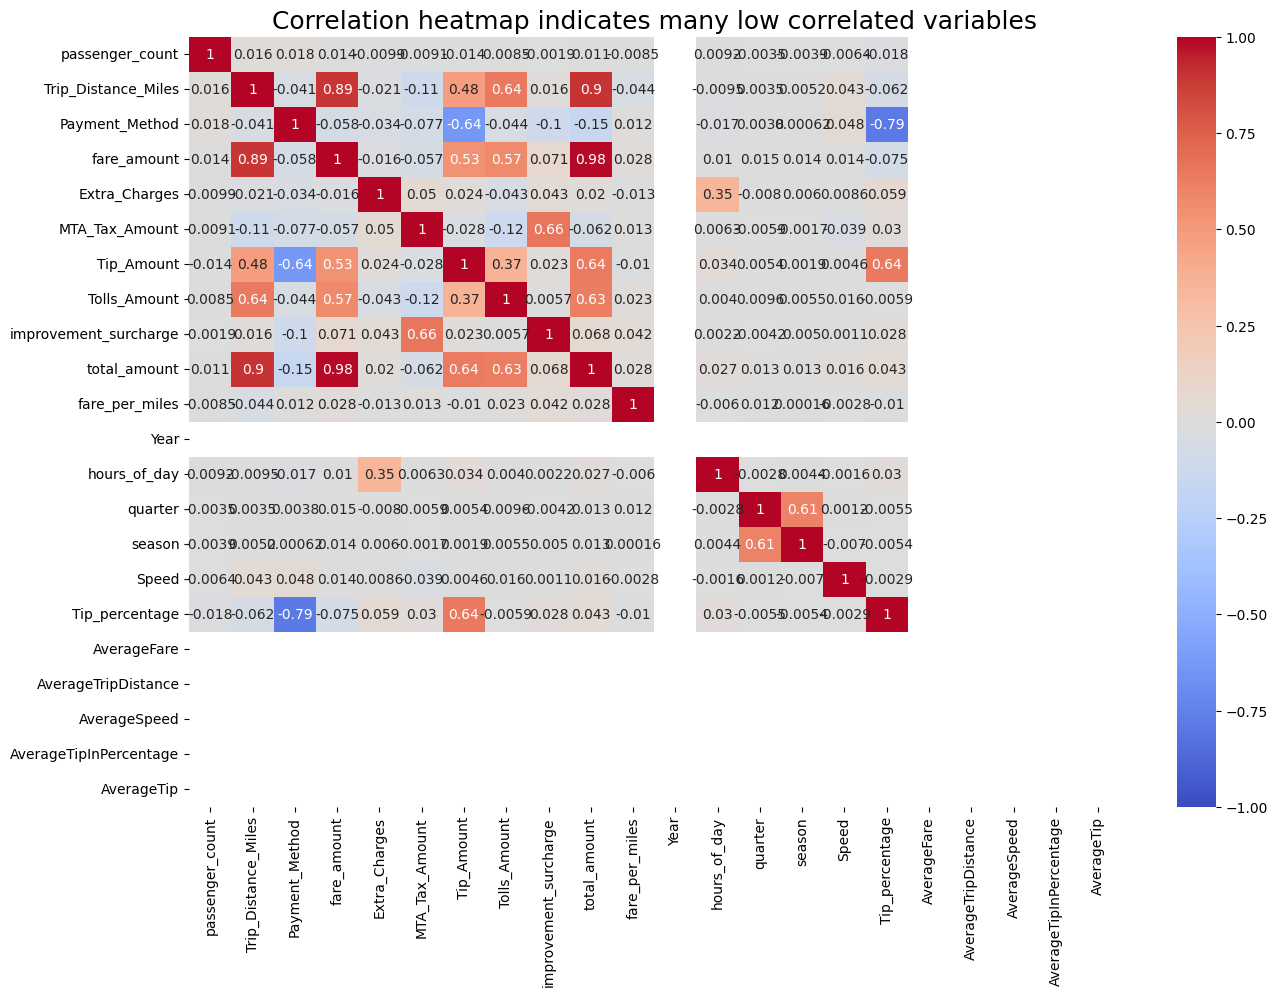

In [ ]:
### YOUR CODE HERE ###
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(DATA.corr(method='pearson', numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();